In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('resource/myfuturejobs_skills2.csv')
df.head()

,job_title,job_details,job_type,education_requirement,language,skills_required,no_skills_required
0,SALES ASSOCIATE,* Under supervision and perform duties to prov...,Permanent,STPM / A Level or Equivalent,en,"['Sales', 'Operations', 'Process', 'Service', ...",6
1,SIGN HOUSE ADVERTISING,Kelebihan diberi kepada yang mempunyai kemahir...,Permanent,Bachelor's or Equivalent,id,"['Adobe', 'Advertising']",2
2,MR DIY (M) SDN BHD,"Receive stock, checking & distribution item re...",Permanent,Diploma / Advanced Diploma / Higher Graduate…,en,"['Operations', 'Distribution']",2
3,Petugas PDK,"1. Bertanggungjawab kepada penyelia PDK, jawat...",Permanent,Bachelor's or Equivalent,id,[],0
4,MR DIY (M) SDN BHD,"Receive stock, checking & distribution item re...",Permanent,SPM / O Level / SKM Level 1 / SKM Level 2 / SK...,en,"['Operations', 'Distribution']",2


## Overall Data Analysis

In [3]:
df.describe()

,no_skills_required
count,19680.000000
mean,5.593140
std,6.754225
min,0.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,53.000000


In [4]:
df.describe(include='object')

,job_title,job_details,job_type,education_requirement,language,skills_required
count,19680,19680,19680,19680,19670,19680
unique,4856,3296,6,11,26,3435
top,General Worker,Sales assistants represent the direct contact ...,Permanent,SPM / O Level / SKM Level 1 / SKM Level 2 / SK...,en,[]
freq,128,167,15653,7988,16950,2718


### Job Type

In [5]:
df['job_type'].unique().tolist()

['Permanent',
 'Contract',
 'Apprenticeship',
 'Temporary',
 'Internship',
 'Part-time']

In [6]:
df['job_type'].value_counts(normalize=True) * 100

Permanent         79.537602
Contract          15.772358
Internship         1.371951
Part-time          1.183943
Apprenticeship     1.133130
Temporary          1.001016
Name: job_type, dtype: float64

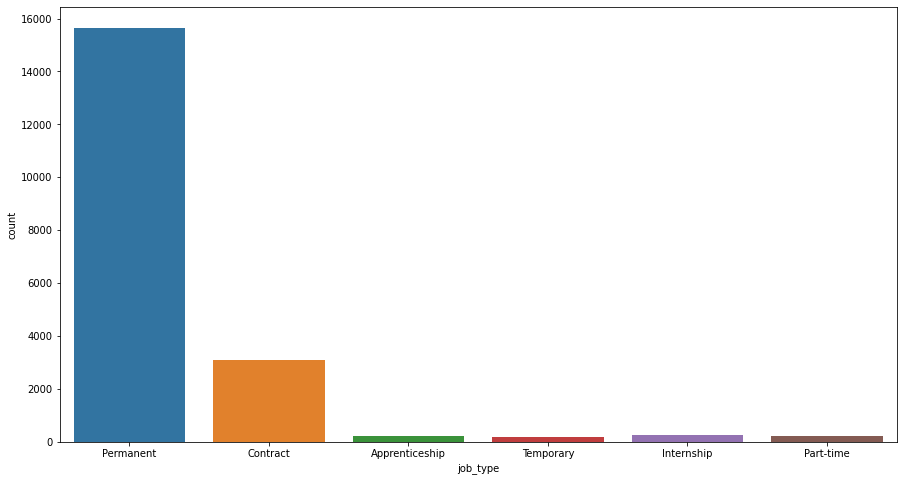

In [7]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_type', data=df);

### Education Requirement

In [8]:
df['education_requirement'].unique().tolist()

['STPM / A Level or Equivalent',
 "Bachelor's or Equivalent",
 'Diploma / Advanced Diploma / Higher Graduate…',
 'SPM / O Level / SKM Level 1 / SKM Level 2 / SKM Level 3 or…',
 'SPM / O Level / SKM Level 1 / SKM Level 2 / SKM Level 3 or Equivalent',
 'Diploma / Advanced Diploma / Higher Graduate Diploma / DVM /…',
 'Primary Education or Below',
 'PMR / PT3 or Equivalent',
 'Diploma / Advanced Diploma / Higher Graduate Diploma / DVM / DKM Level 4 / DLKM Level 5',
 "Master's or Equivalent",
 'Doctoral (PhD) or Equivalent']

In [9]:
df['education'] = df['education_requirement'].replace({
    'Primary Education or Below': '1 - Primary Education',
    'PMR / PT3 or Equivalent': '2 - PMR / PT3',
    'SPM / O Level / SKM Level 1 / SKM Level 2 / SKM Level 3 or…': '3 - SPM / O Level / SKM',
    'SPM / O Level / SKM Level 1 / SKM Level 2 / SKM Level 3 or Equivalent': '3 - SPM / O Level / SKM',
    'STPM / A Level or Equivalent': '4 - STPM / A Level',
    'Diploma / Advanced Diploma / Higher Graduate…': '5 - Diploma / DVM',
    'Diploma / Advanced Diploma / Higher Graduate Diploma / DVM /…': '5 - Diploma / DVM',
    'Diploma / Advanced Diploma / Higher Graduate Diploma / DVM / DKM Level 4 / DLKM Level 5': '5 - Diploma / DVM',
    "Bachelor's or Equivalent": "6 - Bachelor's",
    "Master's or Equivalent": "7 - Master's",
    'Doctoral (PhD) or Equivalent': '8 - Doctoral (PhD)'
})

educations = df['education'].unique().tolist()
educations.sort()
educations

['1 - Primary Education',
 '2 - PMR / PT3',
 '3 - SPM / O Level / SKM',
 '4 - STPM / A Level',
 '5 - Diploma / DVM',
 "6 - Bachelor's",
 "7 - Master's",
 '8 - Doctoral (PhD)']

In [10]:
df['education'].value_counts(normalize=True) * 100

3 - SPM / O Level / SKM    40.980691
5 - Diploma / DVM          25.106707
6 - Bachelor's             20.132114
2 - PMR / PT3               6.890244
1 - Primary Education       3.765244
4 - STPM / A Level          2.337398
7 - Master's                0.487805
8 - Doctoral (PhD)          0.299797
Name: education, dtype: float64

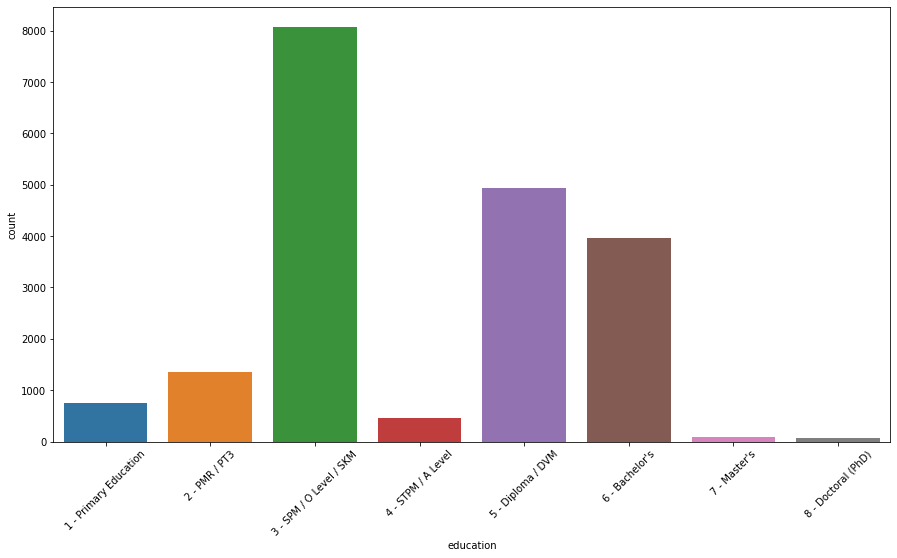

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='education', data=df, order=educations)
plt.xticks(rotation=45);

### Language

In [12]:
df['language'].unique()

array(['en', 'id', 'fr', nan, 'de', 'so', 'sv', 'sw', 'nl', 'tl', 'ca',
       'ro', 'it', 'cy', 'af', 'da', 'et', 'es', 'vi', 'fi', 'no', 'tr',
       'ko', 'zh-cn', 'sl', 'pt', 'hr'], dtype=object)

In [76]:
languages = ['English', 'Others']
df.loc[df['language'] == 'en', 'language2'] = 'English'
df.loc[df['language'] != 'en', 'language2'] = 'Others'
df['language2'].describe()

count       19680
unique          2
top       English
freq        16950
Name: language2, dtype: object

In [14]:
df['language2'].value_counts(normalize=True) * 100

English    86.128049
Others     13.871951
Name: language2, dtype: float64

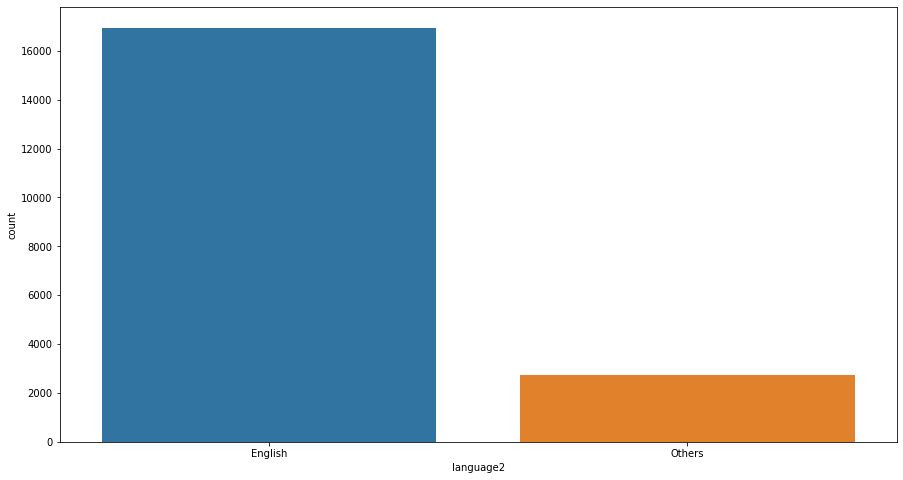

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x='language2', data=df);

### Number of Skills

In [16]:
df['no_skills_required'].describe()

count    19680.000000
mean         5.593140
std          6.754225
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         53.000000
Name: no_skills_required, dtype: float64

In [17]:
df['has_skills'] = False
df.loc[df['no_skills_required'] > 0, 'has_skills'] = True
df['has_skills'].describe()

count     19680
unique        2
top        True
freq      16962
Name: has_skills, dtype: object

In [18]:
df['has_skills'].value_counts(normalize=True) * 100

True     86.189024
False    13.810976
Name: has_skills, dtype: float64

In [19]:
df.loc[df['has_skills'], 'no_skills_required'].describe()

count    16962.000000
mean         6.489388
std          6.863938
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         53.000000
Name: no_skills_required, dtype: float64

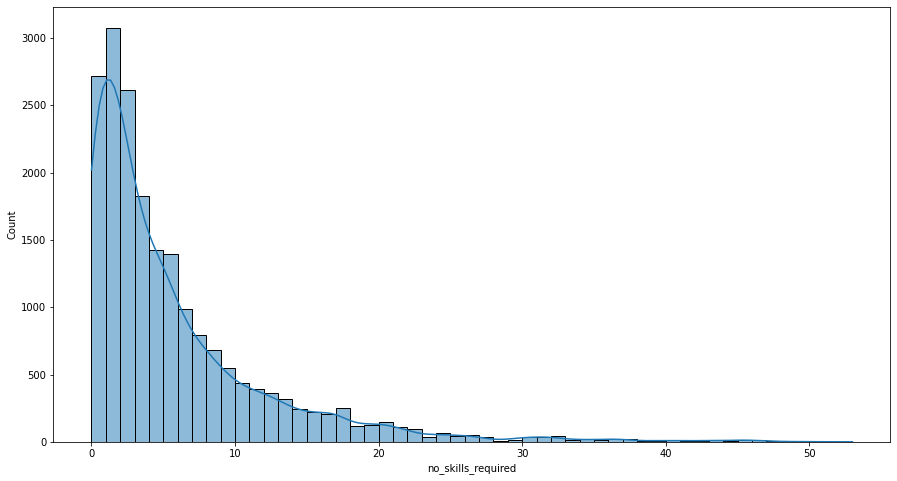

In [40]:
plt.figure(figsize=(15,8))
sns.histplot(x='no_skills_required', data=df, kde=True, binwidth=1);

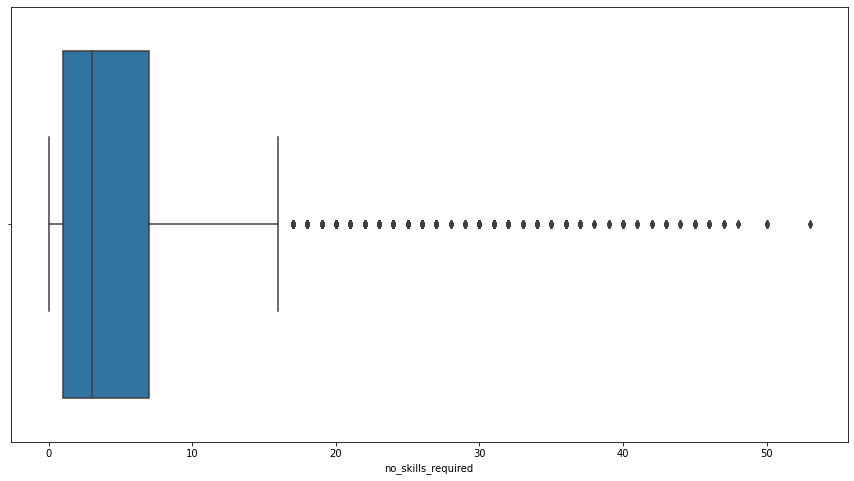

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x='no_skills_required', data=df);

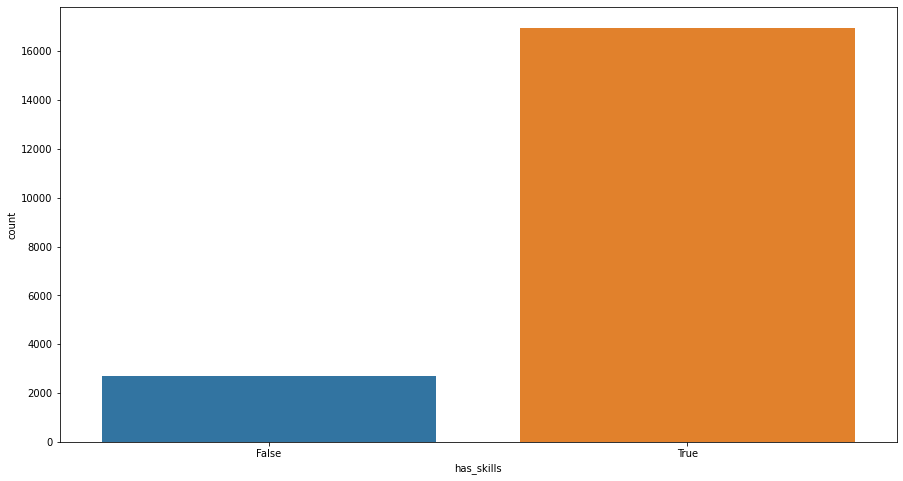

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x='has_skills', data=df);

### Skills

In [23]:
def get_skill_count(df):
    skill_dict = {}
    for _, row in df.iterrows():
        skills = row['skills_required'].lstrip('[').rstrip(']').split(', ')
        if len(skills) > 0:
            for skill in skills:
                skill = skill.strip("'")
                if skill == '':
                    continue
                if skill in skill_dict.keys():
                    skill_dict[skill] += 1
                else:
                    skill_dict[skill] = 1
    return pd.DataFrame.from_dict(skill_dict, orient='index', columns=['count']).reset_index().sort_values(by='count', ascending=False)

In [24]:
df_all = get_skill_count(df)
df_all.head()

,index,count
3,Service,3468
5,Product,3426
11,Management,3268
0,Sales,2600
1,Operations,2544


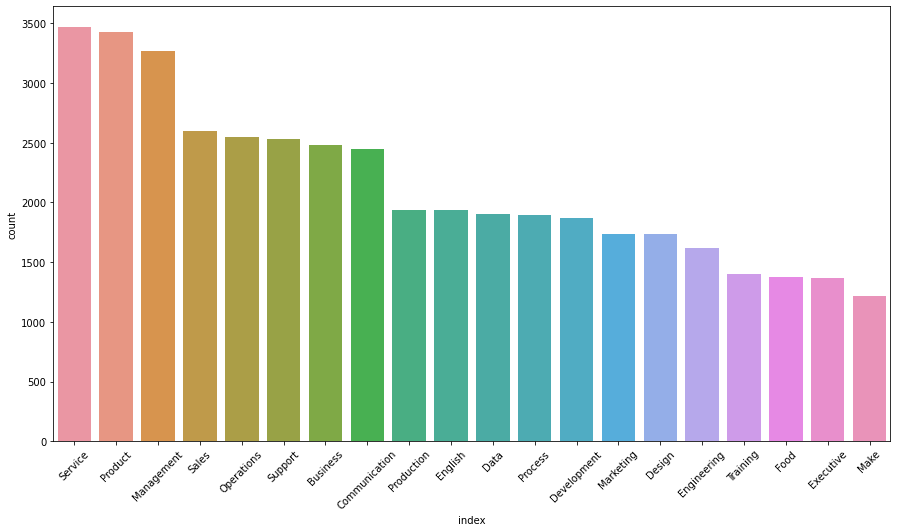

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x='index', y='count', data=df_all.iloc[:20])
plt.xticks(rotation=45);

## Education Analysis

### Language

In [73]:
df.groupby('education')['language2'].value_counts(normalize=True) * 100

education                language2
1 - Primary Education    English      84.075574
                         Others       15.924426
2 - PMR / PT3            English      85.029499
                         Others       14.970501
3 - SPM / O Level / SKM  English      86.236826
                         Others       13.763174
4 - STPM / A Level       English      84.130435
                         Others       15.869565
5 - Diploma / DVM        English      86.156648
                         Others       13.843352
6 - Bachelor's           English      86.850076
                         Others       13.149924
7 - Master's             English      86.458333
                         Others       13.541667
8 - Doctoral (PhD)       English      86.440678
                         Others       13.559322
Name: language2, dtype: float64

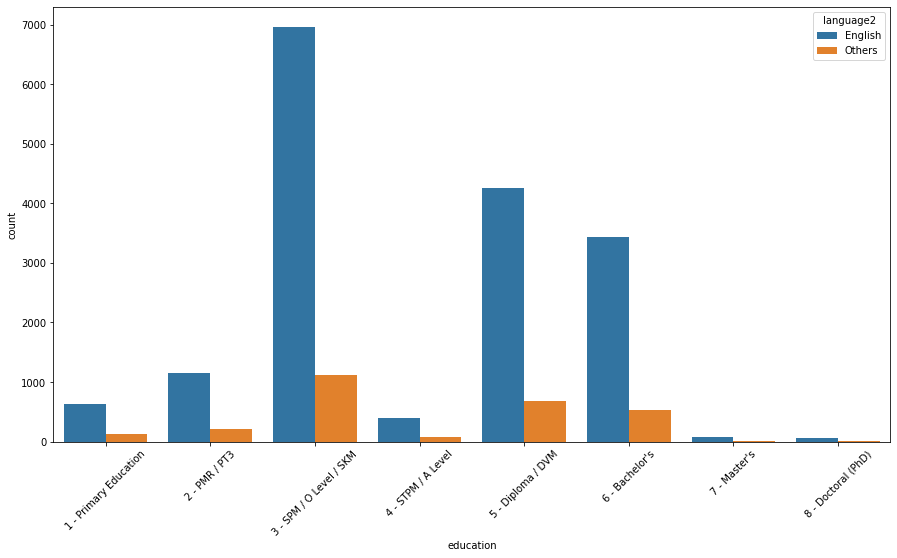

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x='education', hue='language2', data=df,order= educations)
plt.xticks(rotation=45);

### Number of Skills

In [68]:
df.groupby('education').describe()

no_skills_required                                     \
                                     count      mean       std  min  25%  50%   
education                                                                       
1 - Primary Education                741.0  5.174089  6.485800  0.0  1.0  3.0   
2 - PMR / PT3                       1356.0  5.298673  6.275004  0.0  1.0  3.0   
3 - SPM / O Level / SKM             8065.0  5.560198  6.735922  0.0  1.0  3.0   
4 - STPM / A Level                   460.0  5.556522  6.765208  0.0  1.0  3.0   
5 - Diploma / DVM                   4941.0  5.624772  6.702835  0.0  1.0  3.0   
6 - Bachelor's                      3962.0  5.826098  7.066982  0.0  1.0  3.0   
7 - Master's                          96.0  4.927083  6.377996  0.0  1.0  3.0   
8 - Doctoral (PhD)                    59.0  5.203390  6.177768  0.0  1.0  3.0   

                                    
                         75%   max  
education                           
1 - Primary Education    7.0  44.0  
2 - PMR / PT3            7.0  46.0  
3 - SPM / O Level / SKM  7.0  53.0  
4 - STPM / A Level       7.0  45.0  
5 - Diploma / DVM        7.0  53.0  
6 - Bachelor's           8.0  50.0  
7 - Master's             6.0  32.0  
8 - Doctoral (PhD)       6.0  27.0

In [72]:
df.groupby('education')['has_skills'].value_counts(normalize=True) * 100

education                has_skills
1 - Primary Education    True          84.345479
                         False         15.654521
2 - PMR / PT3            True          86.283186
                         False         13.716814
3 - SPM / O Level / SKM  True          85.765654
                         False         14.234346
4 - STPM / A Level       True          83.260870
                         False         16.739130
5 - Diploma / DVM        True          86.925724
                         False         13.074276
6 - Bachelor's           True          86.799596
                         False         13.200404
7 - Master's             True          85.416667
                         False         14.583333
8 - Doctoral (PhD)       True          86.440678
                         False         13.559322
Name: has_skills, dtype: float64

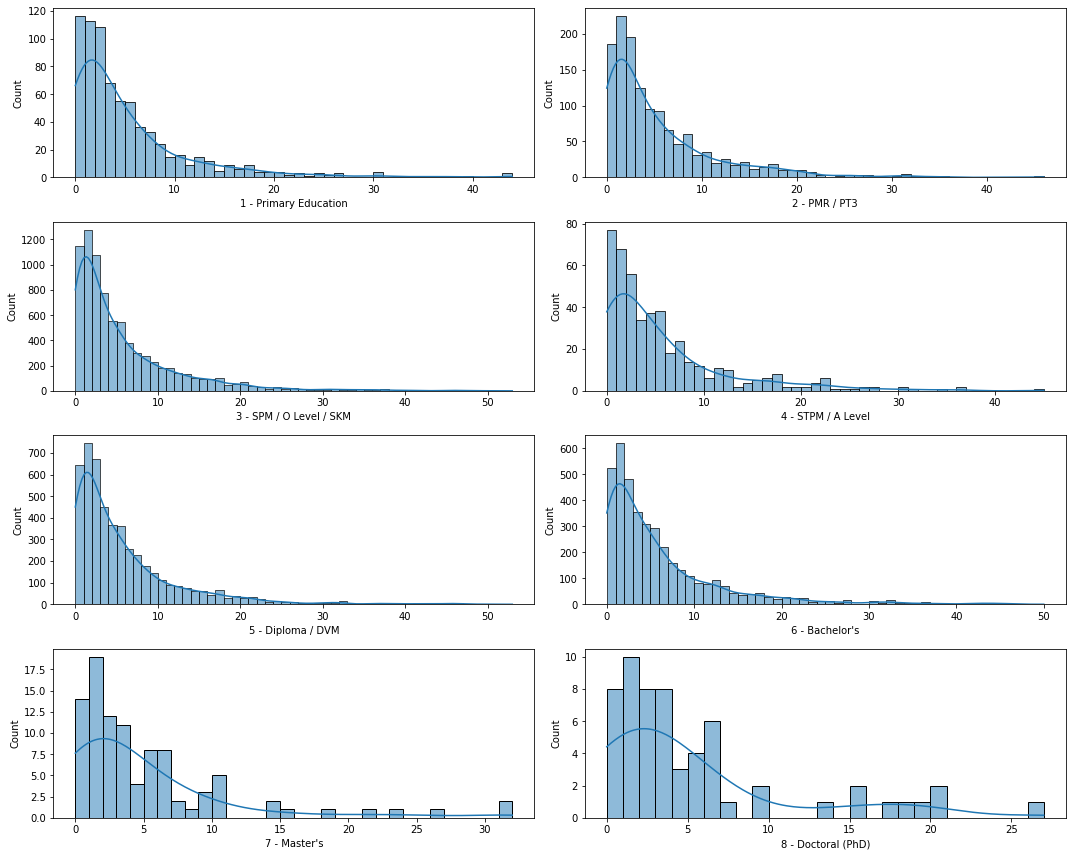

In [49]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_skills_required', data=df.loc[df['education'] == educations[i]], kde=True, binwidth=1, ax=ax)
    ax.set(xlabel=educations[i])

fig.tight_layout();

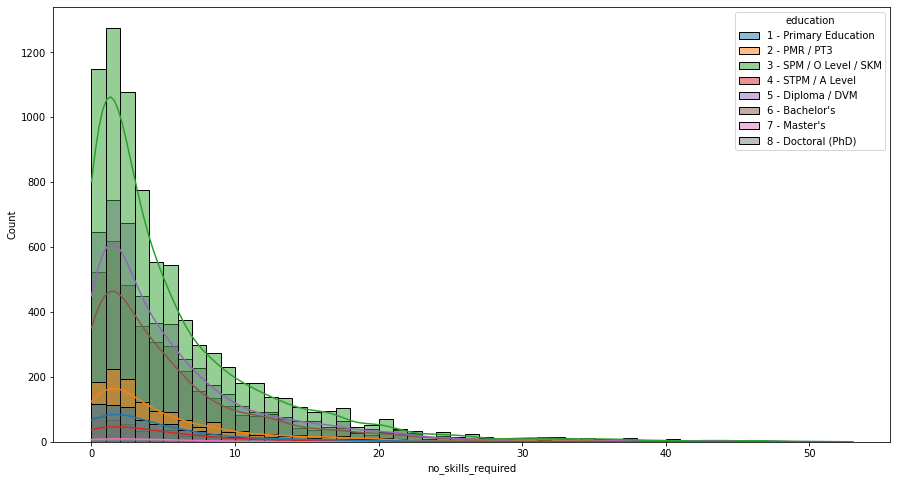

In [43]:
plt.figure(figsize=(15,8))
sns.histplot(x='no_skills_required', hue='education', data=df, kde=True, binwidth=1, hue_order=educations);

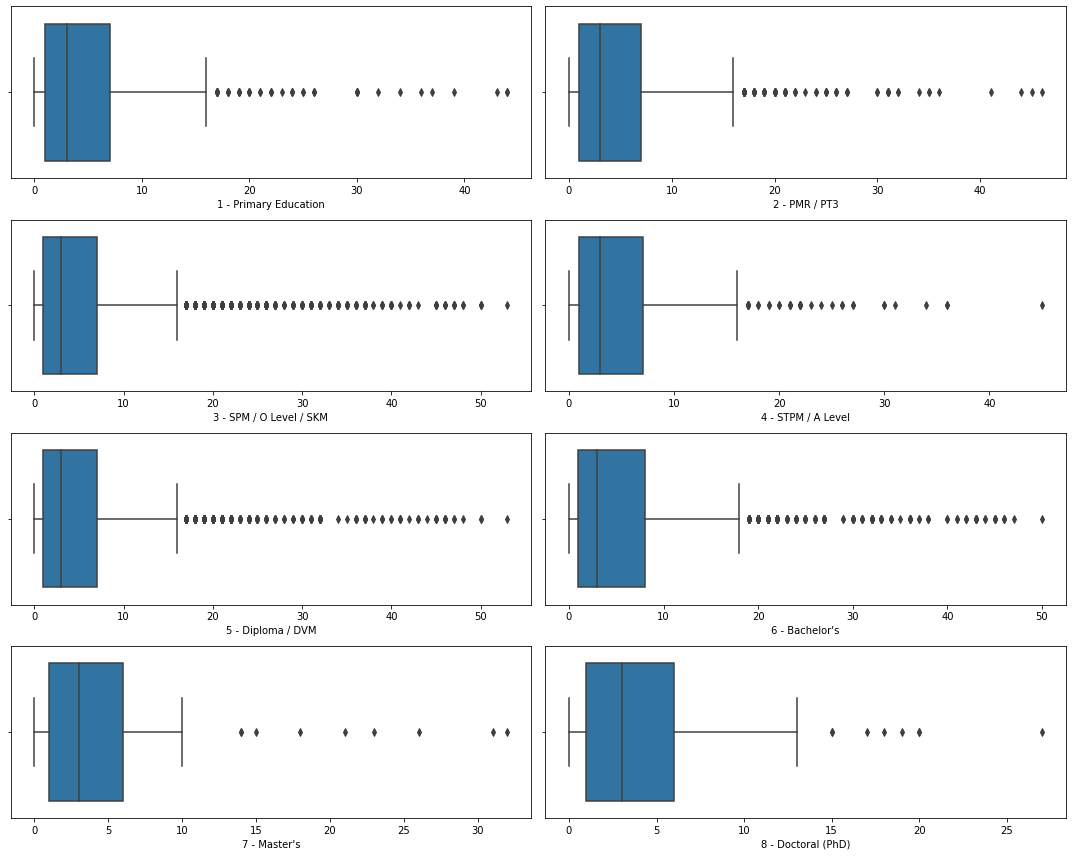

In [51]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_skills_required', data=df.loc[df['education'] == educations[i]], ax=ax)
    ax.set(xlabel=educations[i])

fig.tight_layout();

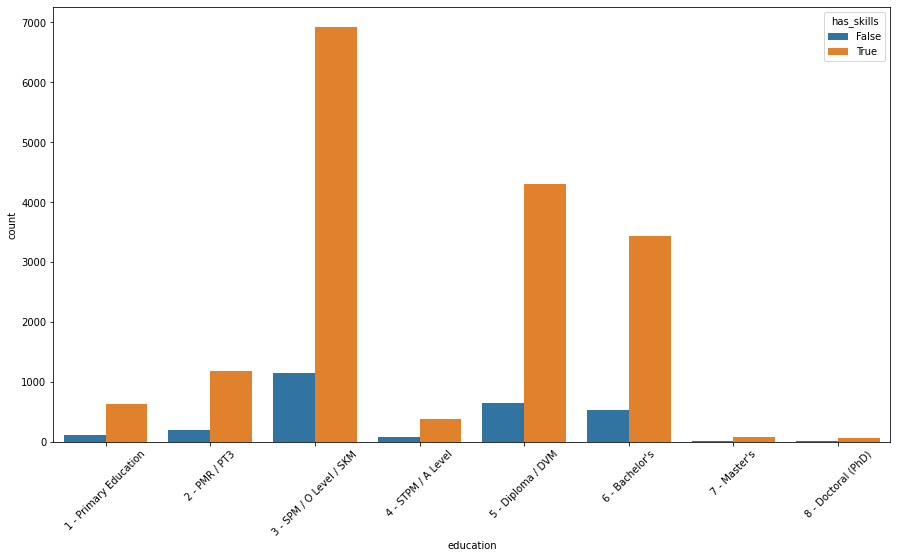

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='education', hue='has_skills', data=df, order=educations)
plt.xticks(rotation=45);

### Skills

In [52]:
edu_skills = {}

for edu in educations:
    edu_skills[edu] = get_skill_count(df.loc[df['education'] == edu])

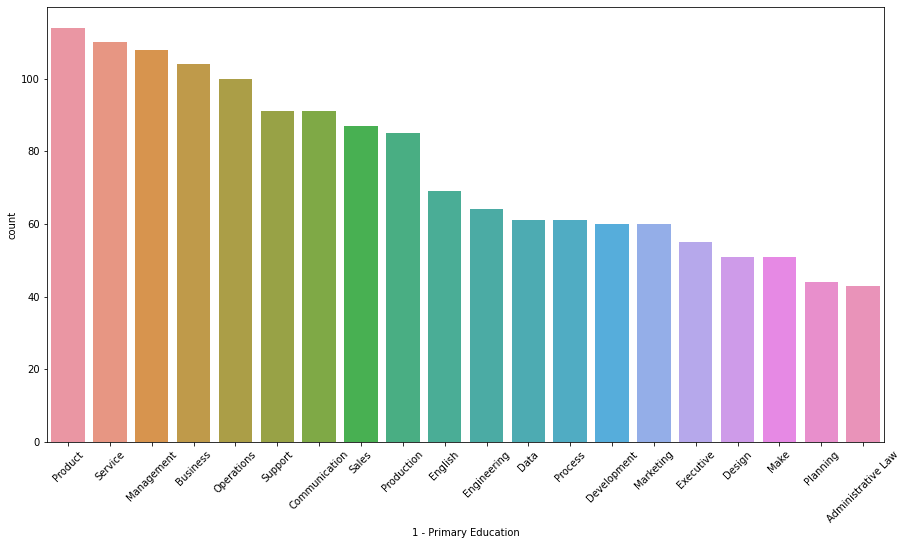

In [59]:
edu = educations[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set(xlabel=edu)
plt.xticks(rotation=45);

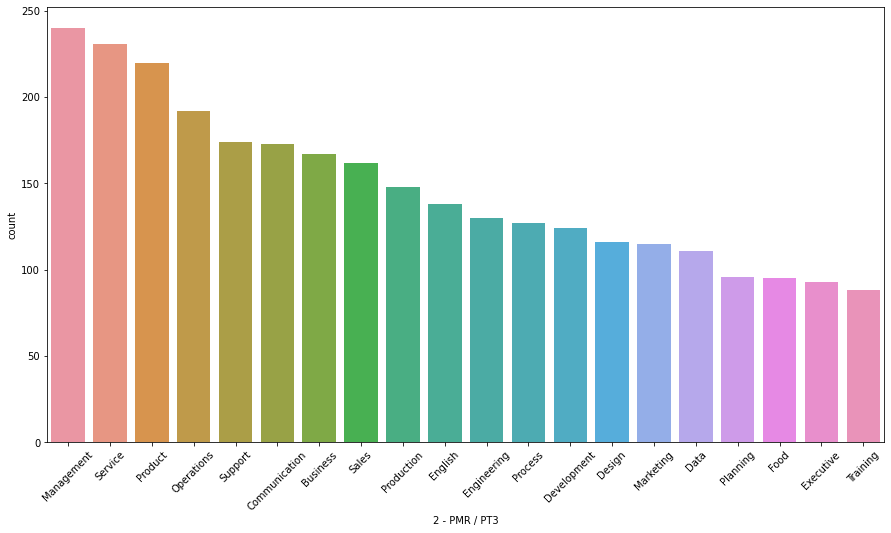

In [60]:
edu = educations[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set(xlabel=edu)
plt.xticks(rotation=45);

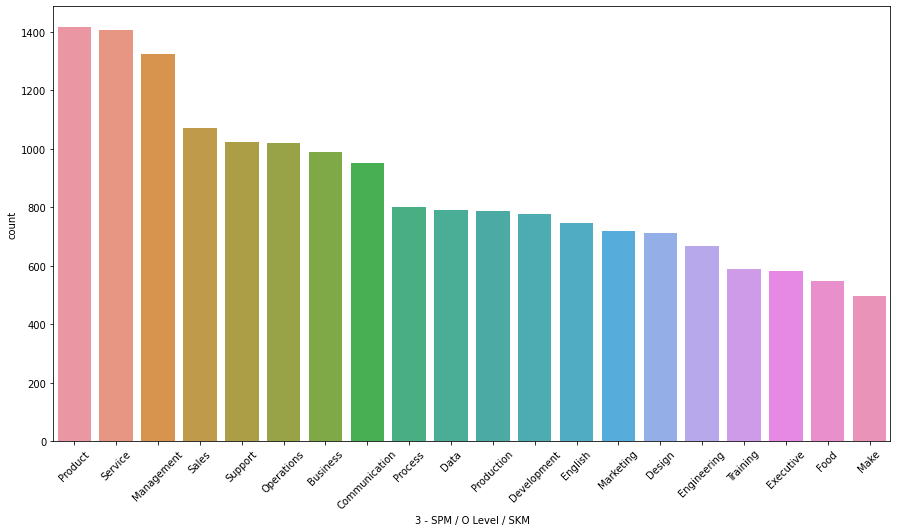

In [61]:
edu = educations[2]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set(xlabel=edu)
plt.xticks(rotation=45);

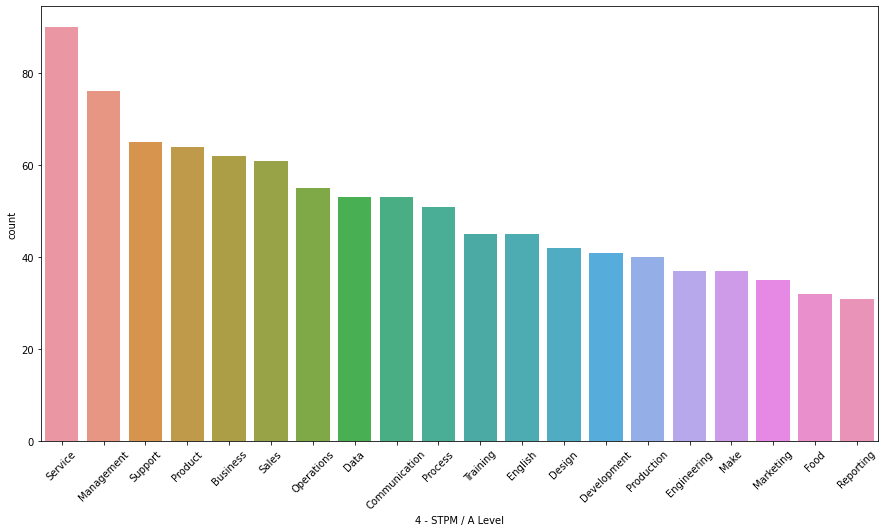

In [62]:
edu = educations[3]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set(xlabel=edu)
plt.xticks(rotation=45);

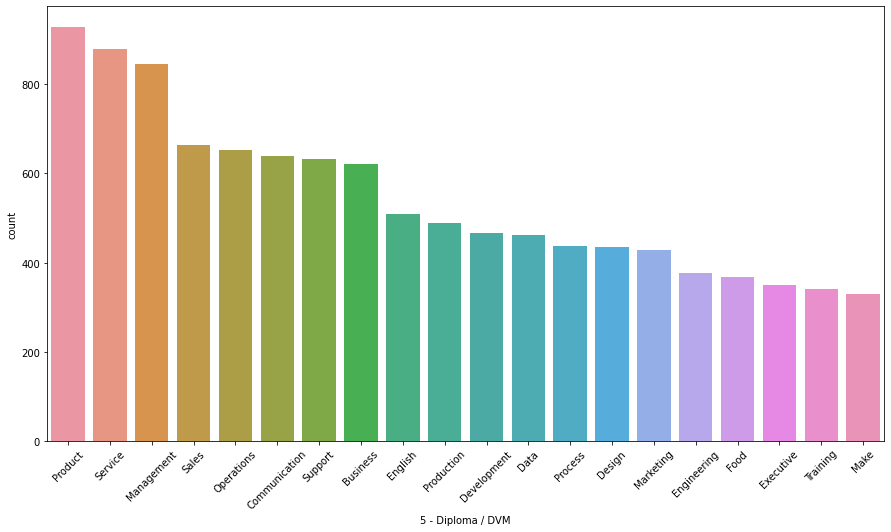

In [63]:
edu = educations[4]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set(xlabel=edu)
plt.xticks(rotation=45);

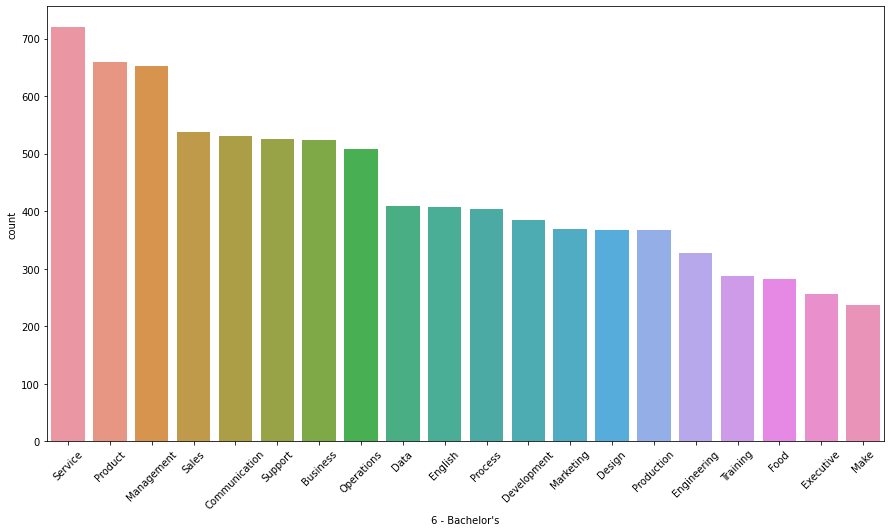

In [64]:
edu = educations[5]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set(xlabel=edu)
plt.xticks(rotation=45);

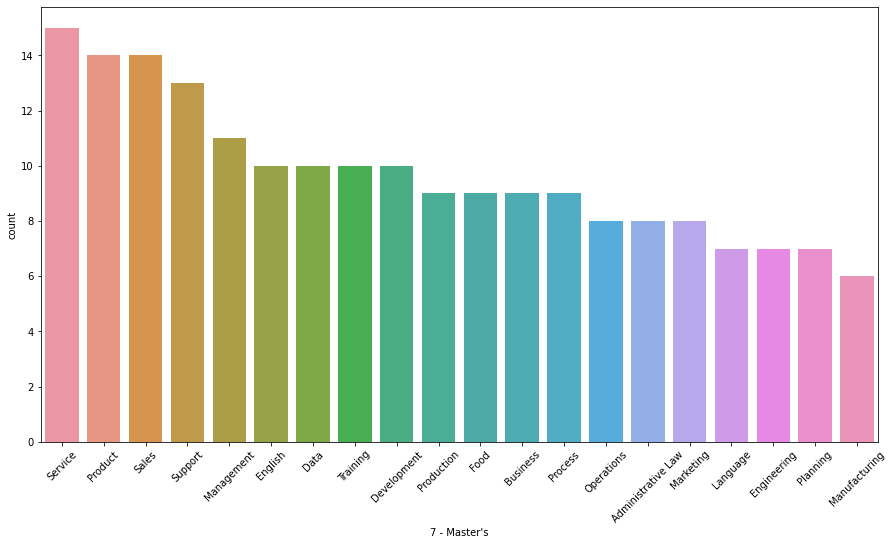

In [65]:
edu = educations[6]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set(xlabel=edu)
plt.xticks(rotation=45);

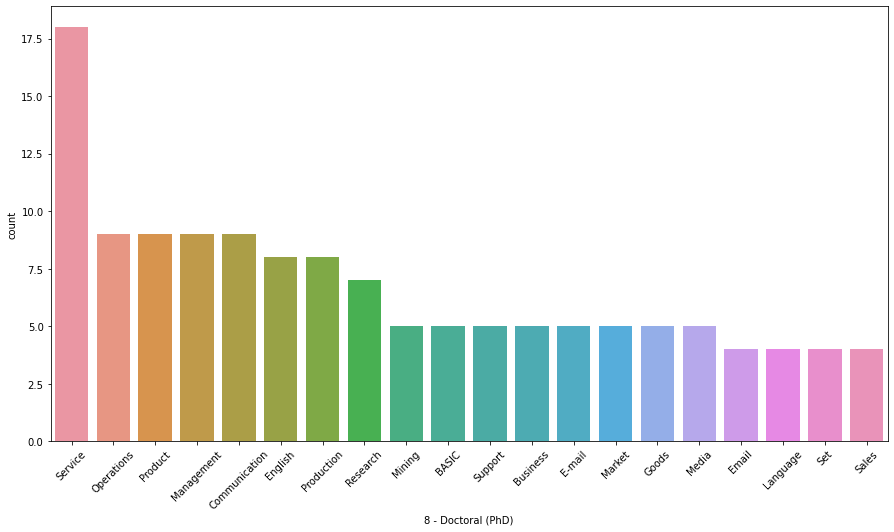

In [66]:
edu = educations[7]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set(xlabel=edu)
plt.xticks(rotation=45);

## Language Analysis

### Number of Skills

In [75]:
df.groupby('language2').describe()

no_skills_required                                              
                       count      mean       std  min  25%  50%  75%   max
language2                                                                 
English              16950.0  6.349735  6.968049  0.0  2.0  4.0  8.0  53.0
Others                2730.0  0.895604  1.335213  0.0  0.0  0.0  1.0  10.0

In [74]:
df.groupby('language2')['has_skills'].value_counts(normalize=True) * 100

language2  has_skills
English    True          92.342183
           False          7.657817
Others     False         52.014652
           True          47.985348
Name: has_skills, dtype: float64

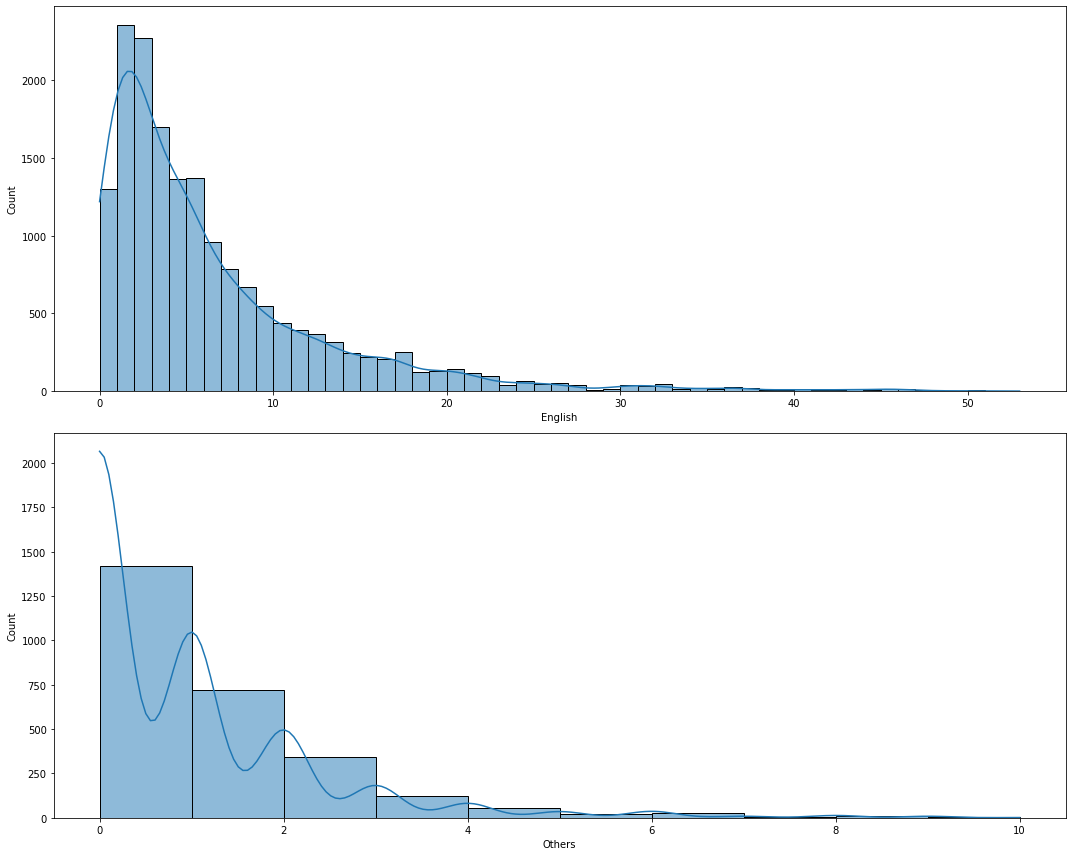

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_skills_required', data=df.loc[df['language2'] == languages[i]], kde=True, binwidth=1, ax=ax)
    ax.set(xlabel=languages[i])

fig.tight_layout();

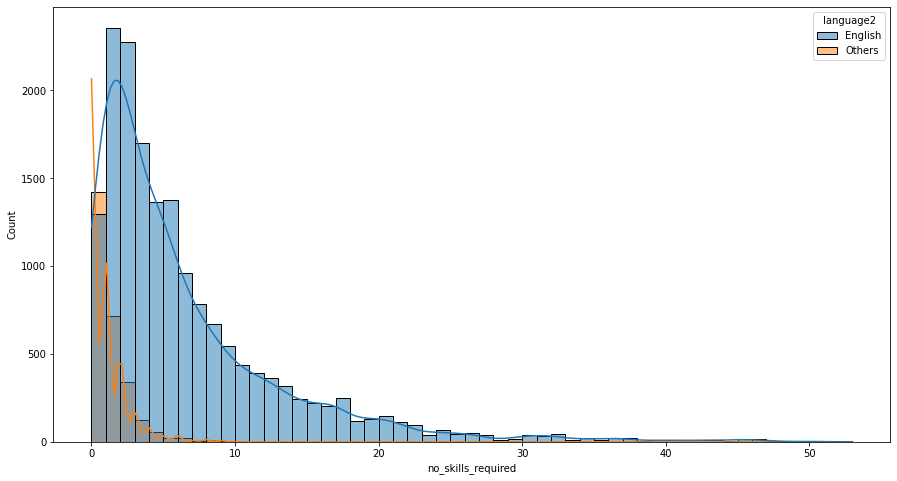

In [79]:
plt.figure(figsize=(15,8))
sns.histplot(x='no_skills_required', hue='language2', data=df, kde=True, binwidth=1, hue_order=languages);

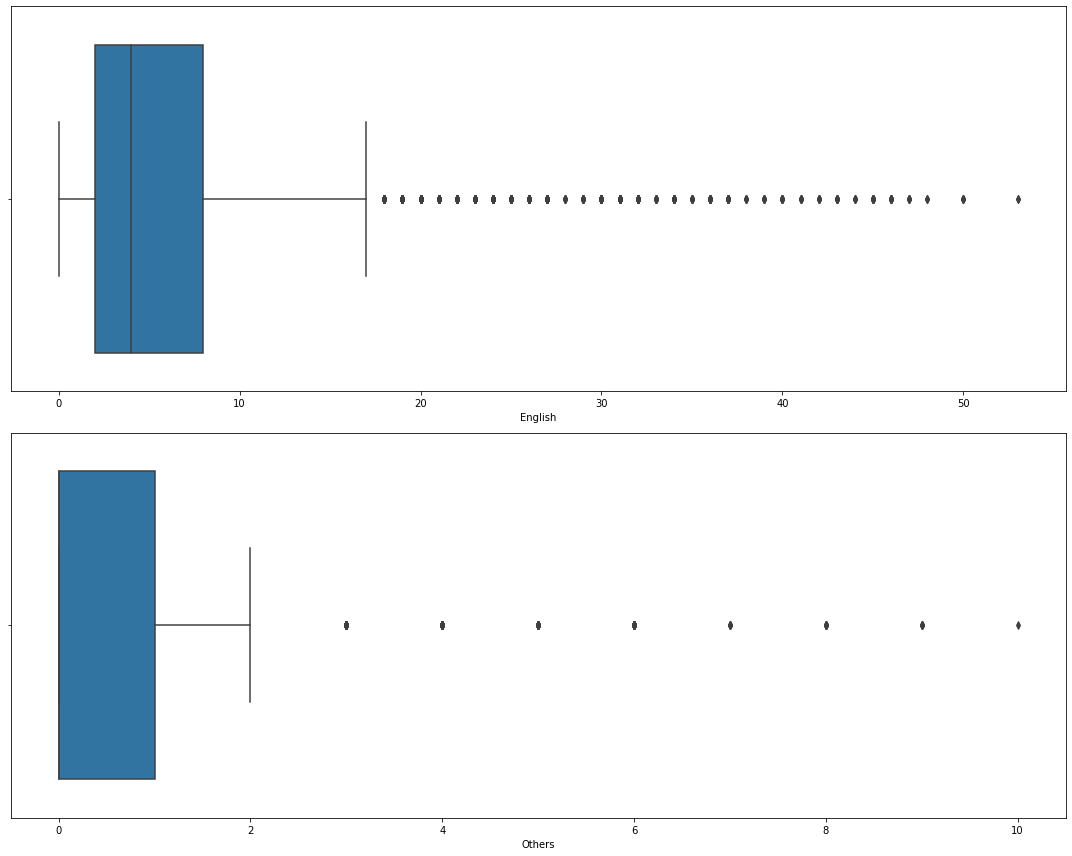

In [80]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_skills_required', data=df.loc[df['language2'] == languages[i]], ax=ax)
    ax.set(xlabel=languages[i])

fig.tight_layout();

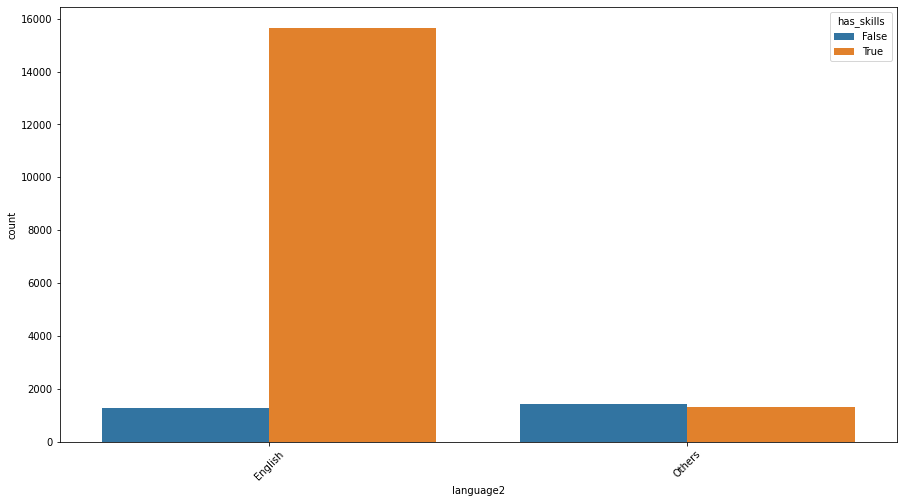

In [82]:
plt.figure(figsize=(15,8))
sns.countplot(x='language2', hue='has_skills', data=df, order=languages)
plt.xticks(rotation=45);

### Skills

In [84]:
lan_skills = {}

for lan in languages:
    lan_skills[lan] = get_skill_count(df.loc[df['language2'] == lan])

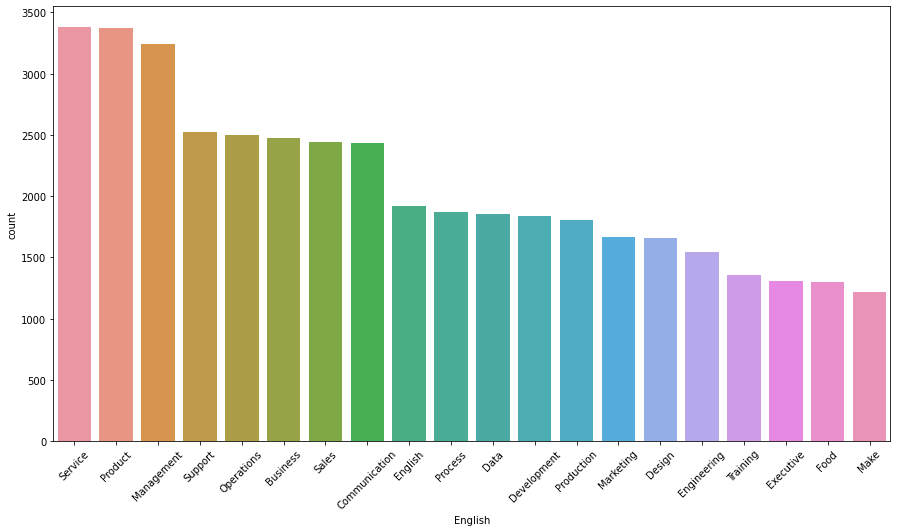

In [86]:
lan = languages[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set(xlabel=lan)
plt.xticks(rotation=45);

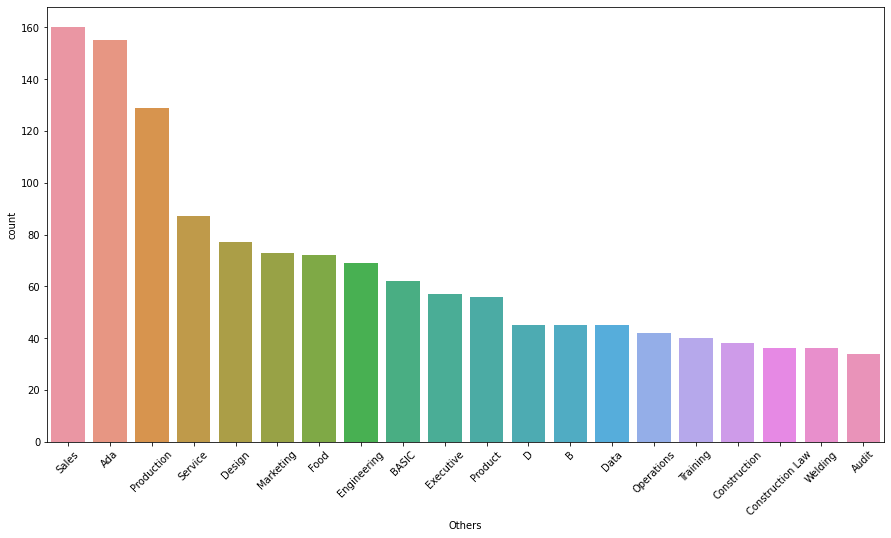

In [87]:
lan = languages[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set(xlabel=lan)
plt.xticks(rotation=45);